In [60]:
import pandas as pd
df = pd.read_csv('aspect_AVN.csv',sep=',')
df = df.drop(['Unnamed: 0'],axis=1)

In [3]:
data = df['aspects_AVN'].str.get_dummies(',')

In [54]:
data = data.dropna()
data.isnull().sum().sum()

0

In [61]:
df = pd.concat([data,df],axis=1)

In [62]:
df = df.fillna('Unknown')

In [63]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['emotions'])
df['emotion_encode']= le.transform(df['emotions'])

In [64]:
df = df.drop(['emotions','aspects_AVN'],axis=1)
df

,abandon becoming movie,able find way,able pull note,able reprise series,able save process,able see hour,able sell story,able take ha,abominable shining moment,abrupt make sense,...,young remind humanity,young screwing whore,young singing sunshine,young thought someone,young trained war,young understand shape,young wendy hiller,young working class,zany filled billie,emotion_encode
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [23]:
df[df['emotions']=='Surprise']          # Surprise - encoded as 4
df[df['emotions']=='Sad']               # Sad -      encoded as 3
df[df['emotions']=='Angry']             # Angry -   encoded as 0
df[df['emotions']=='Happy']             # Happy -   encoded as 2
df[df['emotions']=='Joy']               # Joy -   encoded as 1

In [66]:
df1 = df.copy()
df1 = df1.drop(['emotion_encode'],axis=1)

In [67]:
X = df1.copy()
y = df.iloc[:,-1]

In [68]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [29]:
def euclidean_distance(vector1, vector2):
    return np.sqrt(np.sum(np.power(vector1-vector2, 2)))

In [30]:
def get_neighbours(X_train, X_test_instance, k):
    distances = []
    neighbors = []
    for i in range(0, X_train.shape[0]):
        dist = euclidean_distance(X_train[i], X_test_instance)
        distances.append((i, dist))
    distances.sort(key=operator.itemgetter(1))
    for x in range(k):
        #print(distances[x])
        neighbors.append(distances[x][0])
    return neighbors

In [31]:
def predictkNNClass(output, y_train):
    classVotes = {}
    for i in range(len(output)):
         #print(output[i], y_train[output[i]])
        if y_train[output[i]] in classVotes:
            classVotes[y_train[output[i]]] += 1
        else:
            classVotes[y_train[output[i]]] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    #print(sortedVotes[0][0])
    return sortedVotes[0][0]

In [32]:
def kNN_test(X_train, X_test, Y_train, Y_test, k):
    output_classes = []
    for i in range(0, X_test.shape[0]):
        #print(X_test[i])
        output = get_neighbours(X_train, X_test[i], k)
        predictedClass = predictkNNClass(output, Y_train)
        output_classes.append(predictedClass)
        #print(output_classes)
    return output_classes

In [33]:
def prediction_accuracy(predicted_labels, original_labels):
    count = 0
    for i in range(len(predicted_labels)):
        if predicted_labels[i] == original_labels[i]:
            count += 1
    #print(float(count)/len(predicted_labels))
    return float(count)/len(predicted_labels)

In [73]:
# using knn maual implementation 
import numpy as np
import operator
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
#predicted_classes = {}
#final_accuracies = {}
predicted_classes = kNN_test(X_train, X_test, y_train, y_test, 1)
final_accuracies = prediction_accuracy(predicted_classes, y_test)
print('k =',1,'accuracy=',final_accuracies)

k = 1 accuracy= 0.7233333333333334


In [70]:
#using Sklearn library
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = range(1, 21)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 21
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, p=1, metric = 'euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.7233333333333334, 0.7226666666666667, 0.7233333333333334, 0.7233333333333334, 0.7233333333333334, 0.7233333333333334, 0.7226666666666667, 0.7226666666666667, 0.7226666666666667, 0.7226666666666667, 0.7226666666666667, 0.7226666666666667, 0.7226666666666667, 0.7226666666666667, 0.7226666666666667, 0.7226666666666667, 0.7226666666666667, 0.7226666666666667, 0.7226666666666667, 0.7226666666666667]


In [72]:
print(X_train.shape,X_test.shape)

(8500, 6454) (1500, 6454)


Text(0, 0.5, 'Testing Accuracy')

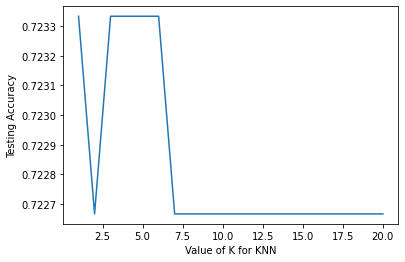

In [71]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
# Hyperparameter Tuning to Improve Model Performance using cross validation in grid serach
from sklearn.model_selection import GridSearchCV
k_range = list(range(1,30))
weight_options = ["uniform", "distance"]
distance = [1, 2]
param_grid = dict(n_neighbors = k_range, p = distance)


knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X,y)

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
